In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-channels/topSubscribed.csv


## The following dataset on which analysis will be performed is about the top 1000 Youtube channels with highest subscriber count that contains columns like Youtube_Channel, Subcribers, Video_Views, Video_count, Category and the Year it started

In [3]:
youtube = pd.read_csv("/kaggle/input/youtube-channels/topSubscribed.csv")
youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015


In [5]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [28]:
youtube.describe()

,Rank,Subscribers,Video Views,Video Count,Views per video
count,1000.00,1000.00,1000.00,1000.00,991.00
mean,500.50,21581400.00,9994912409.73,9416.23,25902034.13
std,288.82,16625563.55,13005457456.50,32190.91,72308550.85
min,1.00,11400000.00,0.00,0.00,28473.61
25%,250.75,13400000.00,3871469970.25,365.50,1904206.92
50%,500.50,16600000.00,6723360159.00,896.00,5776096.81
75%,750.25,23200000.00,12230520916.75,3277.25,17619451.86
max,1000.00,234000000.00,212900271553.00,342802.00,971369179.90


#### From the above data series, it is evident that there are no Null values in the dataset
#### But it could be noticed that the columns like Subscribers, Video Views, Video Counts are of Object type instead of integer type values, so the first data cleaning activity is to change the datatype to it's appropriate values

In [6]:
youtube['Subscribers'] = pd.to_numeric(youtube['Subscribers'])
youtube['Video Views'] = pd.to_numeric(youtube['Video Views'])
youtube['Video Count'] = pd.to_numeric(youtube['Video Count'])
youtube.info()

ValueError: Unable to parse string "234,000,000" at position 0

#### Here an error is generated due to presence of commas(,) in the values of respective columns. Hence first we remove the commas and later convert the datatypes into integer values

In [7]:
youtube['Subscribers'] = youtube['Subscribers'].str.replace(',','').astype(int)
youtube['Video Views'] = youtube['Video Views'].str.replace(',','').astype(int)
youtube['Video Count'] = youtube['Video Count'].str.replace(',','').astype(int)
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


#### Converting the 'Started' column from integer type to date type
#### But before converting it to date type, we need to convert it into string type or else converting date from integer to date will result in abnormal values

In [8]:
youtube['Started'] = youtube['Started'].astype(str)
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [9]:
youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014
997,998,YtCrash,11400000,3825084,1,Education,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015


In [10]:
youtube['Year'] = pd.to_datetime(youtube['Started'], format='%Y').dt.date
youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started,Year
0,1,T-Series,234000000,212900271553,18515,Music,2006,2006-01-01
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015,2015-01-01
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006,2006-01-01
3,4,SET India,150000000,137828094104,103200,Shows,2006,2006-01-01
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012,2012-01-01
...,...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021,2021-01-01
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014,2014-01-01
997,998,YtCrash,11400000,3825084,1,Education,2015,2015-01-01
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015,2015-01-01


In [11]:
youtube.drop('Started', axis=1, inplace=True)
youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Year
0,1,T-Series,234000000,212900271553,18515,Music,2006-01-01
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015-01-01
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006-01-01
3,4,SET India,150000000,137828094104,103200,Shows,2006-01-01
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012-01-01
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021-01-01
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014-01-01
997,998,YtCrash,11400000,3825084,1,Education,2015-01-01
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015-01-01


#### Extracting all the unique values from the 'Category' column to see what categories are in the dataset

In [12]:
youtube['Category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

#### It could be seen that there is a link as a value in the 'Category' column. The second data cleaning activity is to replace them with appropriate values

In [13]:
youtube[youtube['Category'] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels']

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Year
5,6,Music,118000000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013-01-01
9,10,Gaming,93300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013-01-01
17,18,Sports,75100000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013-01-01
91,92,News,36300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013-01-01
106,107,Vlad và Niki,33900000,21008932630,457,https://us.youtubers.me/global/all/top-1000-mo...,2018-01-01
154,155,Popular on YouTube,29300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013-01-01
166,167,व्लाद और निकिता,28700000,17107973877,478,https://us.youtubers.me/global/all/top-1000-mo...,2018-01-01
219,220,Super JoJo - Nursery Rhymes & Kids Songs,24400000,1459730,8,https://us.youtubers.me/global/all/top-1000-mo...,2019-01-01
220,221,D Billions,24400000,27800456761,590,https://us.youtubers.me/global/all/top-1000-mo...,2019-01-01
254,255,Diana and Roma ARA,23000000,10504290129,544,https://us.youtubers.me/global/all/top-1000-mo...,2019-01-01


#### From the above dataset, apart from rows - 5,9,17,91,154,219,357; rest all belongs to 'Howto & Style' category

In [14]:
youtube.loc[youtube['Youtube Channel'] == 'Music', 'Category'] = 'Music'
youtube.loc[youtube['Youtube Channel'] == 'Gaming', 'Category'] = 'Gaming'
youtube.loc[youtube['Youtube Channel'] == 'Sports', 'Category'] = 'Sports'
youtube.loc[youtube['Youtube Channel'] == 'News', 'Category'] = 'News & Politics'
youtube.loc[youtube['Youtube Channel'] == 'Popular on YouTube', 'Category'] = 'Shows'
youtube.loc[youtube['Youtube Channel'] == 'Minecraft - Topic', 'Category'] = 'Gaming'
youtube.loc[youtube['Category'] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', 'Category'] = 'Howto & Style'

In [15]:
youtube[youtube['Category'] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels']

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Year


#### All the irrelevant data is now removed from the 'Category' column

In [16]:
youtube['Category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [17]:
youtube[['Video Views','Video Count']].replace(0,np.nan,inplace=True)
youtube

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Year
0,1,T-Series,234000000,212900271553,18515,Music,2006-01-01
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015-01-01
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006-01-01
3,4,SET India,150000000,137828094104,103200,Shows,2006-01-01
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012-01-01
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021-01-01
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014-01-01
997,998,YtCrash,11400000,3825084,1,Education,2015-01-01
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015-01-01


#### Creating a new column to show how many views per video for a Youtube channel

In [18]:
youtube['Views per video'] = round(youtube['Video Views']/youtube['Video Count'],2)
pd.options.display.float_format = '{:.2f}'.format
youtube

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Year,Views per video
0,1,T-Series,234000000,212900271553,18515,Music,2006-01-01,11498799.44
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015-01-01,NaN
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006-01-01,176222433.15
3,4,SET India,150000000,137828094104,103200,Shows,2006-01-01,1335543.55
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012-01-01,29398538.59
...,...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021-01-01,4281965.18
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014-01-01,7611316.95
997,998,YtCrash,11400000,3825084,1,Education,2015-01-01,3825084.00
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015-01-01,2265797.34


#### Cleaning of the data has been completed as of yet
#### Deriving key insights from the data by analyzing it

## 1) Determining the top 10 channels on youtube based on subscriber counts

In [19]:
top10_channels = youtube.loc[youtube['Video Views']!=0,['Youtube Channel','Subscribers','Views per video']].head(10)
top10_channels

,Youtube Channel,Subscribers,Views per video
0,T-Series,234000000,11498799.44
2,Cocomelon - Nursery Rhymes,152000000,176222433.15
3,SET India,150000000,1335543.55
4,MrBeast,128000000,29398538.59
6,PewDiePie,111000000,6146545.22
7,✿ Kids Diana Show,106000000,82044101.25
8,Like Nastya,104000000,115653760.84
10,WWE,92800000,1111882.24
11,Vlad and Niki,92700000,139315612.27
12,Zee Music Company,91600000,7085338.35


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


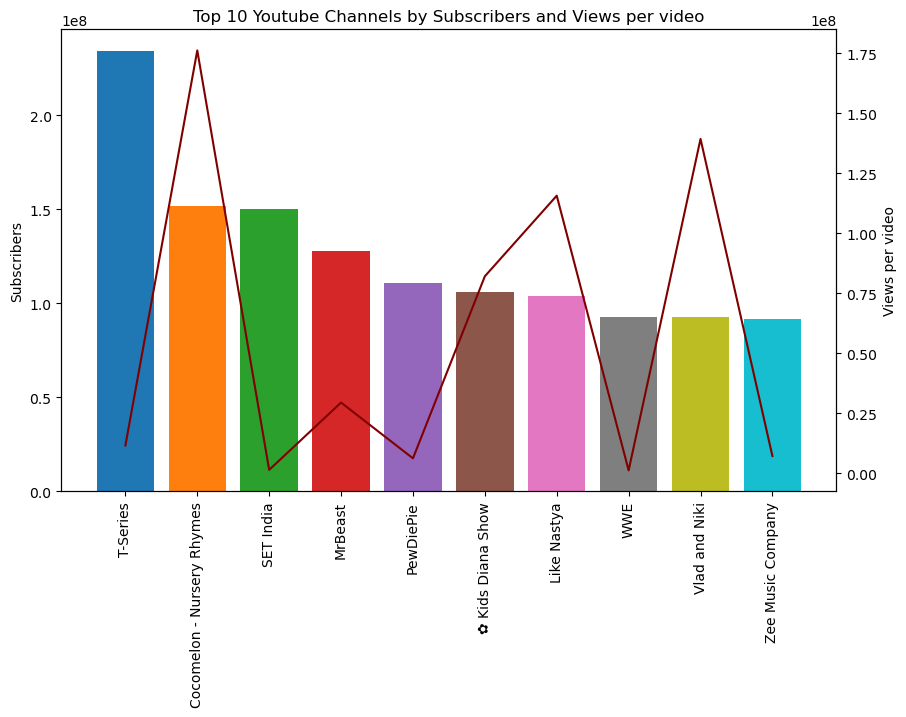

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax1.set_ylabel('Subscribers', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.bar(top10_channels['Youtube Channel'], top10_channels['Subscribers'], color=colors)

# create line graph for 'Views per video'
ax2 = ax1.twinx()
ax2.set_ylabel('Views per video', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.plot(top10_channels['Youtube Channel'], top10_channels['Views per video'], color='maroon')

# set chart properties
plt.title('Top 10 Youtube Channels by Subscribers and Views per video')
ax1.set_xticklabels(top10_channels['Youtube Channel'], rotation=90)

# display the chart
plt.show()

#### From the above plotting, it could be derived that the views per count does not depend on the subscriber count

## 2) Which category is has been performing better in terms of views

In [21]:
best_category = youtube.groupby('Category')['Video Views'].sum()
best_category = best_category.reset_index().rename(columns={'Video Views': 'Total Views'})
best_category.sort_values('Total Views', ascending=False)

,Category,Total Views
8,Music,3058929450985
3,Entertainment,2218980613268
11,People & Blogs,1108132436989
5,Gaming,671374062722
2,Education,638114991185
4,Film & Animation,518043392749
1,Comedy,424592260530
14,Shows,419888740161
6,Howto & Style,375084155976
9,News & Politics,252717799570


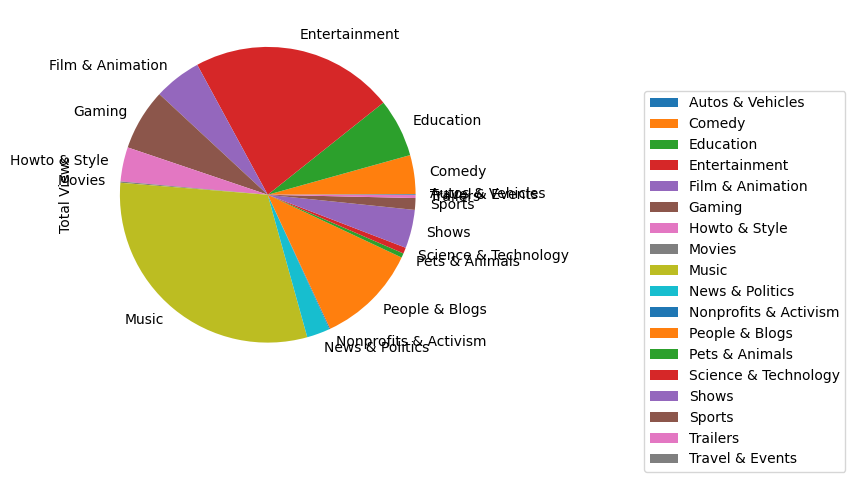

In [22]:
plot = best_category.plot(kind='pie',y='Total Views', labels=best_category['Category'], legend=False)
plot.legend(loc='upper left', bbox_to_anchor=(1.5, 0.8))
plt.show()

#### From the above chart, it is evident that categories like Music, Entertainment, People and Blogs are dominating in terms of views on Youtube

## 3) Is there any relation between the rank of the youtube channel (number of subscribers) to that of either views or number of videos

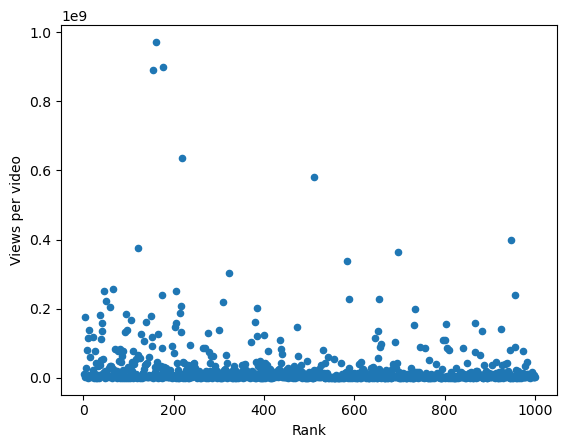

In [42]:
count_view = youtube.plot(kind='scatter', x='Rank', y='Views per video')
count_view.set_xlabel("Rank")
count_view.set_ylabel("Views per video")
plt.show()

#### It appears that there is no significant relation between the rank and either count/viewership of the videos

## 4) Determining which year was the birth of the most popular youtube channels

In [64]:
pop_year = youtube.groupby('Year')[['Subscribers','Views per video']].sum()
pop_year.sort_values('Subscribers', ascending=False)

,Subscribers,Views per video
Year,,
2014-01-01,2385600000,1518491659.16
2013-01-01,2064100000,2305617200.37
2006-01-01,2048900000,2557856655.87
2015-01-01,1957600000,1148718340.59
2012-01-01,1854400000,894236530.95
2011-01-01,1839500000,2109650132.02
2016-01-01,1657400000,1786678907.36
2009-01-01,1256300000,2999865157.92
2017-01-01,1125200000,1297128567.35


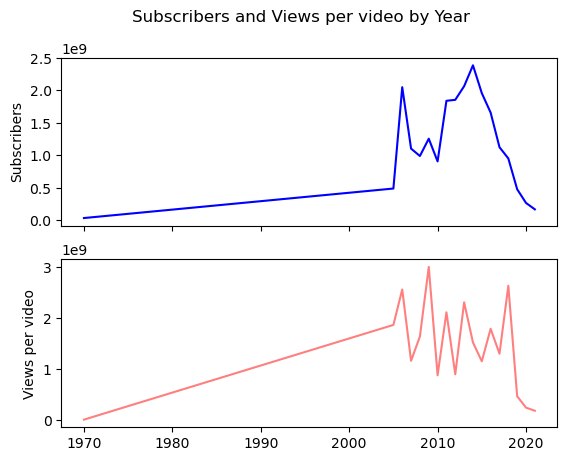

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

# plot the subscribers data on the first subplot as a line plot
ax1.plot(pop_year.index, pop_year['Subscribers'], color='blue')
ax1.set_ylabel('Subscribers')

# plot the views per video data on the second subplot as a bar plot
ax2.plot(pop_year.index, pop_year['Views per video'], color='red', alpha=0.5)
ax2.set_ylabel('Views per video')

# set the title of the plot
fig.suptitle('Subscribers and Views per video by Year')

# show the plot
plt.show()

#### From the above graphs, it could be concluded that most of the popular channels on youtube were started around the years - 2011 to 2014 and one in 2006.